<a href="https://colab.research.google.com/github/papu7896/projects/blob/main/IIT%20admission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [3]:
df=pd.read_csv('/content/student_data.csv')
df.head()

,Student ID,Student Name,Date of Birth,Field of Study,Year of Admission,Expected Year of Graduation,Current Semester,Specialization,Fees,Discount on Fees
0,165527,Bryan Rogers,2006-01-19,Computer Science,2020.0,2017.0,3.0,Web Development,155152.0,19572.0
1,635763,James Hogan,1999-05-23,Mechanical Engineering,2020.0,2020.0,2.0,Machine Learning,157870.0,14760.0
2,740021,David Robinson,1997-12-02,Civil Engineering,2017.0,2022.0,1.0,Network Security,55662.0,5871.0
3,433076,Susan Miller,1999-10-30,Computer Science,2021.0,2019.0,1.0,Data Science,134955.0,17284.0
4,441628,Brittany Martin,1998-01-10,Chemical Engineering,2016.0,2018.0,1.0,Network Security,125934.0,14871.0


In [4]:
df.columns

Index(['Student ID', 'Student Name', 'Date of Birth', 'Field of Study',
       'Year of Admission', 'Expected Year of Graduation', 'Current Semester',
       'Specialization', 'Fees', 'Discount on Fees'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55056 entries, 0 to 55055
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Student ID                   55056 non-null  int64  
 1   Student Name                 55056 non-null  object 
 2   Date of Birth                55056 non-null  object 
 3   Field of Study               55056 non-null  object 
 4   Year of Admission            55055 non-null  float64
 5   Expected Year of Graduation  55055 non-null  float64
 6   Current Semester             55055 non-null  float64
 7   Specialization               55055 non-null  object 
 8   Fees                         55055 non-null  float64
 9   Discount on Fees             55055 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 4.2+ MB


In [6]:
df.shape

(55056, 10)

In [7]:
df.isnull().sum()

Student ID                     0
Student Name                   0
Date of Birth                  0
Field of Study                 0
Year of Admission              1
Expected Year of Graduation    1
Current Semester               1
Specialization                 1
Fees                           1
Discount on Fees               1
dtype: int64

In [8]:
df.dropna(axis=0,inplace=True)


In [10]:
df.duplicated().sum()

0

In [11]:
df.describe()

,Student ID,Year of Admission,Expected Year of Graduation,Current Semester,Fees,Discount on Fees
count,55055.000000,55055.000000,55055.000000,55055.000000,55055.000000,55055.000000
mean,549855.937317,2018.980928,2019.988938,2.496740,124974.383144,12398.137898
std,258405.878383,1.999464,1.994854,1.117576,43311.376027,8762.169058
min,100003.000000,2016.000000,2017.000000,1.000000,50000.000000,0.000000
25%,327464.500000,2017.000000,2018.000000,1.000000,87606.500000,5327.000000
50%,550132.000000,2019.000000,2020.000000,2.000000,125264.000000,10705.000000
75%,773321.500000,2021.000000,2022.000000,3.000000,162365.500000,17977.500000
max,999932.000000,2022.000000,2023.000000,4.000000,199999.000000,39715.000000


<Axes: >

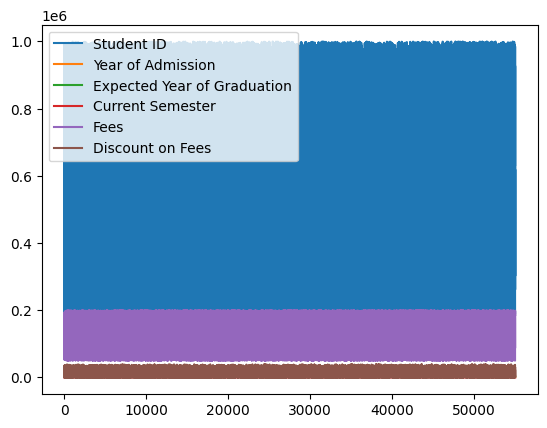

In [12]:
df.plot()

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

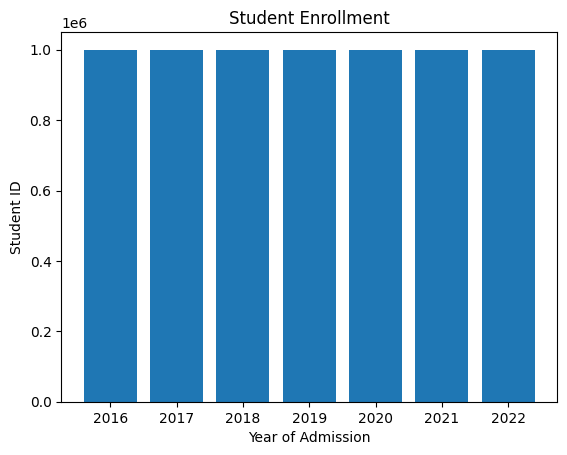

In [16]:
x = df['Year of Admission']
y = df['Student ID']

# Create the bar chart
plt.bar(x, y)

# Add labels and title
plt.xlabel('Year of Admission')
plt.ylabel('Student ID')
plt.title('Student Enrollment')

# Display the chart
plt.show()

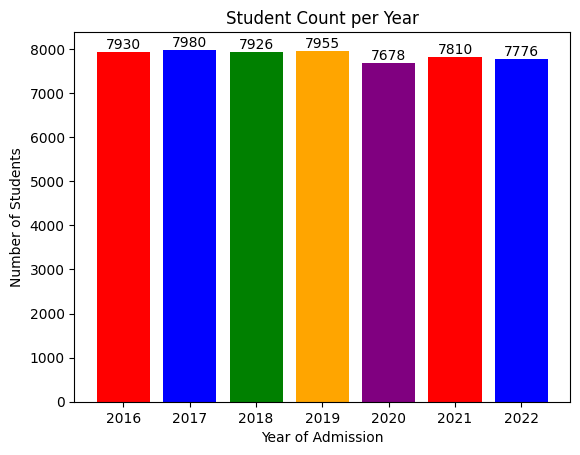

In [19]:
year_counts = df['Year of Admission'].value_counts()

# Sort the counts by year
year_counts = year_counts.sort_index()

# Define colors for each bar
colors = ['red', 'blue', 'green', 'orange', 'purple']

# Create the bar chart with custom colors
plt.bar(year_counts.index, year_counts.values, color=colors)
for i, count in enumerate(year_counts.values):
    plt.text(year_counts.index[i], count, str(count), ha='center', va='bottom')

# Add labels and title
plt.xlabel('Year of Admission')
plt.ylabel('Number of Students')
plt.title('Student Count per Year')

# Display the chart
plt.show()

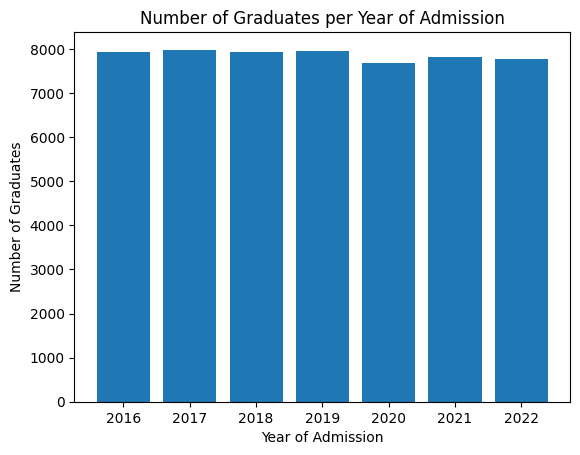

In [22]:
# Group the data by year of admission and calculate the count of students for each year
graduation_counts = df.groupby('Year of Admission')['Expected Year of Graduation'].count()

# Sort the counts by year of admission
graduation_counts = graduation_counts.sort_index()

# Create the bar chart
plt.bar(graduation_counts.index, graduation_counts.values)

# Add labels and title
plt.xlabel('Year of Admission')
plt.ylabel('Number of Graduates')
plt.title('Number of Graduates per Year of Admission')

# Display the chart
plt.show()

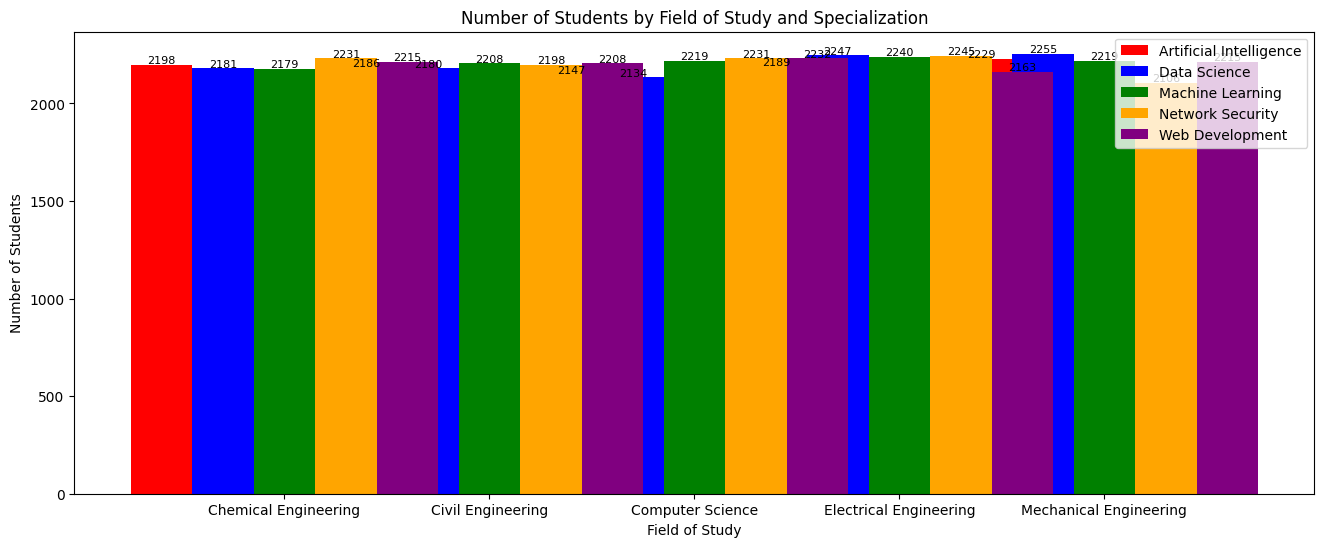

In [31]:

# Assuming you have a DataFrame 'df' with 'Field of Study' and 'Specialization' columns

# Group the data by field of study and specialization and calculate the count of students for each combination
field_specialization_counts = df.groupby(['Field of Study', 'Specialization']).size().unstack()

# Create the bar chart
bar_width = 0.3 # Width of each bar
index = range(len(field_specialization_counts.index))
colors = ['red', 'blue', 'green', 'orange', 'purple']  # Custom colors for each bar

plt.figure(figsize=(16, 6))  # Specify the figure size (width, height) in inches

for i, column in enumerate(field_specialization_counts.columns):
    plt.bar(index, field_specialization_counts[column], width=bar_width, color=colors[i], label=column)
    index = [idx + bar_width for idx in index]

# Add labels and title
plt.xlabel('Field of Study')
plt.ylabel('Number of Students')
plt.title('Number of Students by Field of Study and Specialization')

# Add count labels on top of each bar
for i, column in enumerate(field_specialization_counts.columns):
    for j, value in enumerate(field_specialization_counts[column]):
        count_label = str(value)
        plt.text(j + i * bar_width, value + 5, count_label, ha='center', fontsize=8)

# Adjust x-axis ticks and labels
plt.xticks([r + bar_width * (len(field_specialization_counts.columns) - 1) / 2 for r in range(len(field_specialization_counts.index))],
           field_specialization_counts.index)

# Show legend
plt.legend()

# Display the chart
plt.show()

In [33]:
# Convert 'Date of Birth' column to datetime format
df['Date of Birth'] = pd.to_datetime(df['Date of Birth'])

# Extract the year component into a new column 'Year of Birth'
df['Year of Birth'] = df['Date of Birth'].dt.year

# Display the updated DataFrame
df.head()

,Student ID,Student Name,Date of Birth,Field of Study,Year of Admission,Expected Year of Graduation,Current Semester,Specialization,Fees,Discount on Fees,Year of Birth
0,165527,Bryan Rogers,2006-01-19,Computer Science,2020.0,2017.0,3.0,Web Development,155152.0,19572.0,2006
1,635763,James Hogan,1999-05-23,Mechanical Engineering,2020.0,2020.0,2.0,Machine Learning,157870.0,14760.0,1999
2,740021,David Robinson,1997-12-02,Civil Engineering,2017.0,2022.0,1.0,Network Security,55662.0,5871.0,1997
3,433076,Susan Miller,1999-10-30,Computer Science,2021.0,2019.0,1.0,Data Science,134955.0,17284.0,1999
4,441628,Brittany Martin,1998-01-10,Chemical Engineering,2016.0,2018.0,1.0,Network Security,125934.0,14871.0,1998


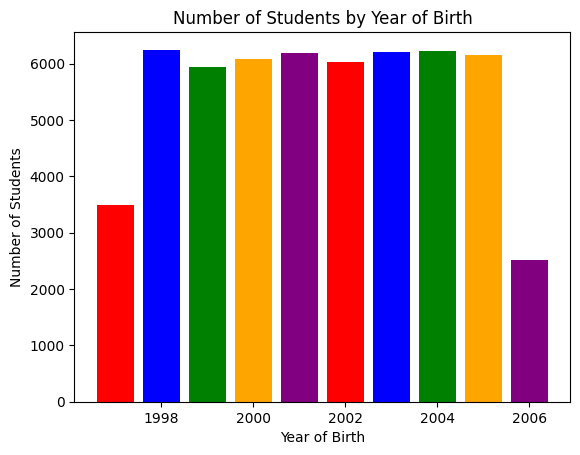

In [36]:
# Group the data by 'Year of Birth' and calculate the count of students for each year
birth_year_counts = df['Year of Birth'].value_counts().sort_index()

# Define custom colors for the bars
colors = ['red', 'blue', 'green', 'orange', 'purple']

# Create the bar chart with custom colors
plt.bar(birth_year_counts.index, birth_year_counts.values, color=colors)

# Add labels and title
plt.xlabel('Year of Birth')
plt.ylabel('Number of Students')
plt.title('Number of Students by Year of Birth')

# Display the chart
plt.show()

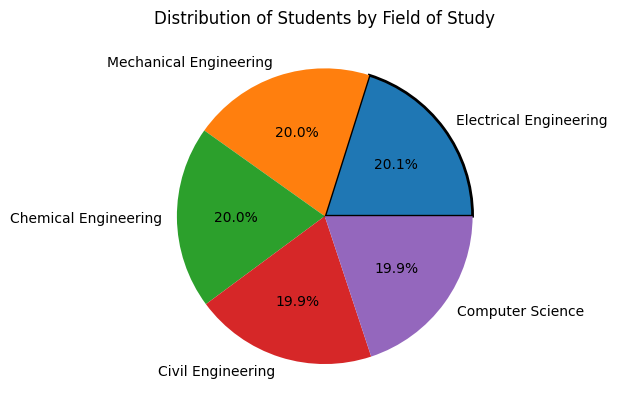

In [37]:

# Calculate the count of each field of study
field_counts = df['Field of Study'].value_counts()

# Get the field of study with the highest count
highest_field = field_counts.idxmax()

# Create a pie chart
plt.pie(field_counts, labels=field_counts.index, autopct='%1.1f%%')

# Add a title
plt.title('Distribution of Students by Field of Study')

# Highlight the slice for the field of study with the highest count
highest_field_index = field_counts.index.get_loc(highest_field)
plt.gca().patches[highest_field_index].set_edgecolor('black')
plt.gca().patches[highest_field_index].set_linewidth(2)

# Display the chart
plt.show()

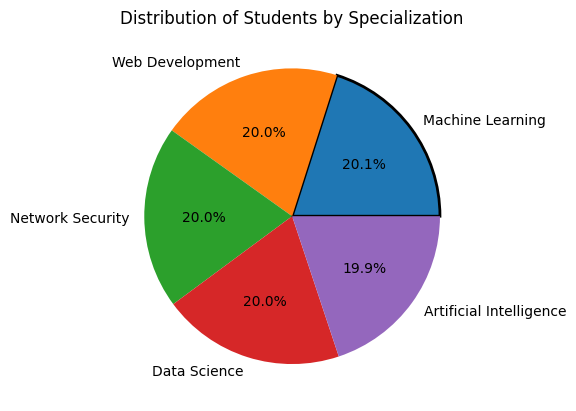

In [44]:
# Calculate the count of each specialization
specialization_counts = df['Specialization'].value_counts()

# Get the specialization with the highest count
highest_specialization = specialization_counts.idxmax()

# Create a pie chart
plt.pie(specialization_counts, labels=specialization_counts.index, autopct='%1.1f%%')

# Add a title
plt.title('Distribution of Students by Specialization')

# Highlight the slice for the specialization with the highest count
highest_specialization_index = specialization_counts.index.get_loc(highest_specialization)
plt.gca().patches[highest_specialization_index].set_edgecolor('black')
plt.gca().patches[highest_specialization_index].set_linewidth(2)

# Display the chart
plt.show()

In [39]:
field_of_study_unique = df['Field of Study'].unique()
print(field_of_study_unique)

# Check unique values in 'Specialization'
specialization_unique = df['Specialization'].unique()
print(specialization_unique)

['Computer Science' 'Mechanical Engineering' 'Civil Engineering'
 'Chemical Engineering' 'Electrical Engineering']
['Web Development' 'Machine Learning' 'Network Security' 'Data Science'
 'Artificial Intelligence']
